## NPX MODEL

# Load libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# plot the uptake rate

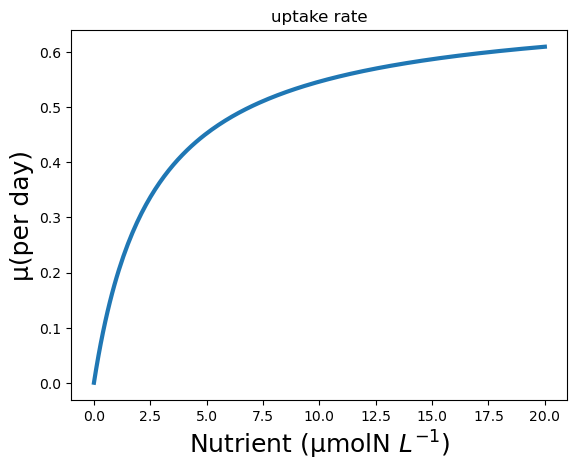

In [2]:
# Definition of the function
def f(x,mu,k):
    return (mu*(x/(x+k)))
# Definition of the interval
a, b = 0, 20

# Générate values the  function
N = np.linspace(a, b, 200)
y = f(N,0.69,2.62)
# plot the uptake rate
plt.plot(N, y,linewidth=3)

# add a title and axis labels
plt.title('uptake rate')
plt.xlabel('Nutrient (µmolN $ L^{-1}) $',fontsize=18)
plt.ylabel('µ(per day)',fontsize=18)

# display the graphic
plt.show()

# Set parameter values

In [3]:
# set parameters values

N0=30              # amount of constant nutrient flowing into the nutrient pool N (µmolN $ L^{-1}) $)
mu=0.69            #maximum uptake rate of nutrient by phytoplankton ($ day ^{-1})$)
k=2.62             #half-saturation constant for nutrient uptake  (µmolN $ L^{-1}) $)
m=0.1             #natural mortality of phytoplankton (day-1)
D=0.1             #dilution rate  ($ day ^{-1})$)
delta=0.1        #fraction of toxin production
gamma=0.2          #toxin release rate  ($ day ^{-1})$)
n_p= 1.12*10**-5   #conversion factor (amount of nutrient per cell)



# Building Python function for the processes

In [6]:
def system(y, t, N0, mu, k, m, D, delta, gamma,n_p): # definition of the function
    N, P, X = y
    #N nutrient(nitrogen)
    #P phytoplankton producing toxin
    #X toxin per cell produced by phytoplankton
    
    
    dNdt = D *( N0 - N) - f(N,mu,k) *P *n_p
    dPdt = (1 - delta) * f(N,mu,k) * P - D * P - m * P
    dXdt = delta * f(N,mu,k)*n_p - gamma*X
    
    return [dNdt, dPdt, dXdt]
y0 = [1, 0.1,0] 

sol = odeint(system, y0, t, args=(N0, mu, k, m, D, delta, gamma,n_p))#using odeint function to solve the ODE equation


# Set vector of initial conditions & Time

In [5]:
#  vector of initial values respectively for N(0),P(0),X(0)
y0 = [1, 0.1,0] 

# the time vector is (daily time step):

t = np.linspace (0 , 700,1000)

# integrate and save results into array
sol = odeint(system, y0, t, args=(N0, mu, k, m, D, delta, gamma,n_p))#using odeint function to solve the ODE equation

# Plotting results

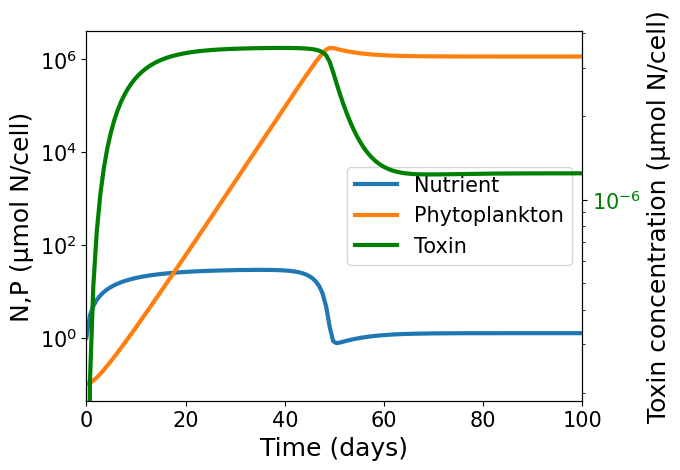

In [7]:
fig, ax1 = plt.subplots()

ax1.set_xlabel('Time (days)',fontsize=18)
ax1.set_ylabel('N,P (µmol N/cell)',fontsize=18)
ax1.plot(t, sol[:, 0], linewidth=3, label='Nutrient')
ax1.plot(t, sol[:, 1], linewidth=3, label='Phytoplankton')
ax1.set_yscale('log')
ax1.tick_params(axis='y')

ax2 = ax1.twinx()
ax2.set_ylabel('Toxin concentration (µmol N/cell)',fontsize=18)
ax2.plot(t, sol[:, 2], linewidth=3, label='Toxin', color='green')
ax2.set_yscale('log')
ax2.tick_params(axis='y', labelcolor='green')

#ax1.set_ylim(0, 1e7)
#ax2.set_ylim(0,1e-5)
ax1.set_xlim(left=0)
ax2.set_xlim(left=0)
ax1.set_xlim(right=100)

handles, labels = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
all_handles = handles + handles2
all_labels = labels + labels2
ax1.legend(all_handles, all_labels, fontsize=15)
#increase the size of axis 
ax1.tick_params(axis='both', labelsize=15)
ax2.tick_params(axis='both', labelsize=15)





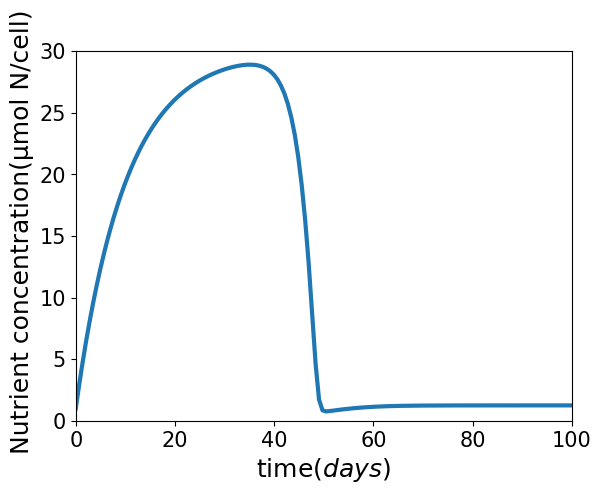

In [8]:
plt.plot(t, sol[:, 0], label='N',linewidth=3)
# add a title and axis labels

plt.ylabel(' Nutrient concentration(µmol N/cell)',fontsize=18)
plt.xlabel('time($ days)$',fontsize=18)
plt.ylim([0,30])
plt.xlim([0,100])
#increase the size of axis 
plt.xticks(fontsize=15)  # Augment the font size of x-axis tick labels
plt.yticks(fontsize=15)  # Augment the font size of y-axis tick labels

plt.show()



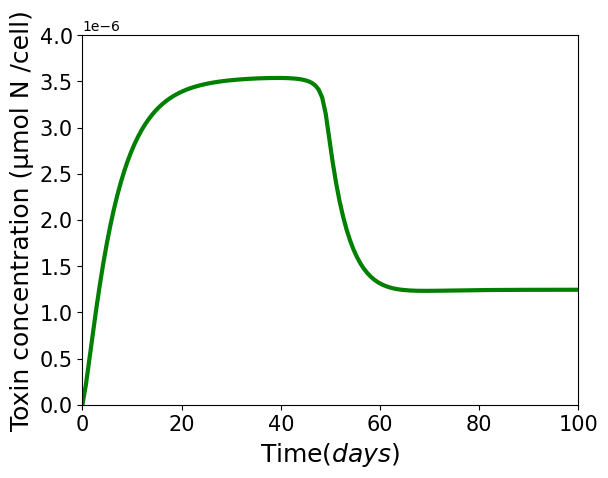

In [9]:

X = sol[:, 2]

# Plot the time series of X
plt.plot(t, X,color='green',linewidth=3)

plt.xlabel('Time($ days$)',fontsize=18)
plt.ylabel('Toxin concentration (µmol N /cell)',fontsize=18)

plt.xlim(left=0)
plt.xlim(right=100)
plt.ylim(0,4e-6)
#increase the size of axis 
plt.xticks(fontsize=15)  # Augment the font size of x-axis tick labels
plt.yticks(fontsize=15)  # Augment the font size of y-axis tick labels
plt.show()




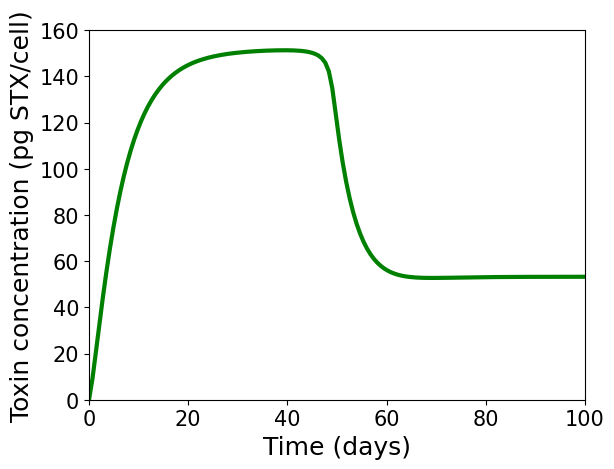

<Figure size 640x480 with 0 Axes>

In [10]:
# Define the initial conditions
N_init = 1
P_init = 0.1
X_init = 0

y0 = [N_init, P_init, X_init]

# Solve the system of differential equations
sol = odeint(system, y0, t, args=(N0, mu, k, m, D, delta, gamma,n_p))

# Extract the time series of X in µmolN/cell
X_umolN_cell = sol[:, 2]

# Convert X from µmolN/cell to pg of Saxitoxin/cell
X_pg_cell = (X_umolN_cell * 14.0067 * 299.29 / 98) * 10**6

# Plot the time series of X
plt.plot(t, X_pg_cell,color='green', linewidth=3)

plt.xlabel('Time (days)',fontsize=18)
plt.ylabel('Toxin concentration (pg STX/cell)',fontsize=18)
#increase the size of axis 
plt.xticks(fontsize=15)  # Augment the font size of x-axis tick labels
plt.yticks(fontsize=15)  # Augment the font size of y-axis tick labels
plt.xlim(left=0)
plt.xlim(right=100)


plt.ylim([0,160])
plt.show()
plt.savefig ('STX.png')

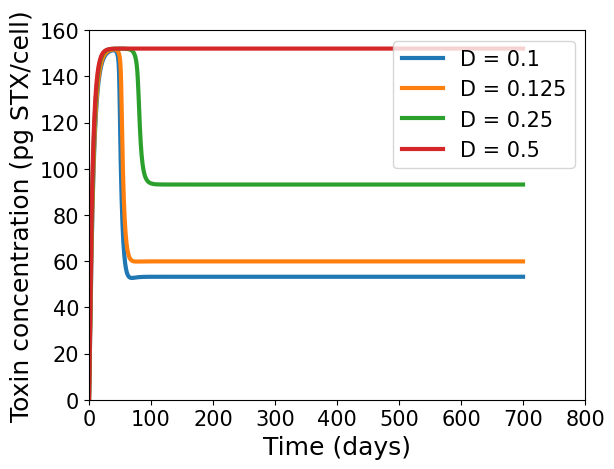

In [12]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

def system(y, tspan, N0, mu, k, m, D, delta, gamma, n_p):
    N, P, X = y
    
    dNdt = D *( N0 - N) - f(N,mu,k) *P *n_p
    dPdt = (1 - delta) * f(N,mu,k) * P - D * P - m * P
    dXdt = delta * f(N,mu,k)*n_p - gamma*X
    
    
    return [dNdt, dPdt, dXdt]

N_init = 1
P_init = 0.1
X_init = 0

y0 = [N_init, P_init, X_init]

tspan = np.linspace(0, 700, 1000)

D_values = [0.1, 0.125, 0.25, 0.5,]

for D_local in D_values:
    sol = odeint(system, y0, tspan, args=(N0, mu, k, m, D_local, delta, gamma, n_p))
    X_umolN_cell = sol[:, 2]
    X_pg_cell = (X_umolN_cell * 14.0067 * 299.29 / 98) * 10**6
    plt.plot(tspan, X_pg_cell, label="D = {}".format(D_local),linewidth=3)

plt.legend(fontsize=15)
plt.xlabel('Time (days)',fontsize=18)
plt.ylabel('Toxin concentration (pg STX/cell)',fontsize=18)
#increase the size of axis 
plt.xticks(fontsize=15)  # Augment the font size of x-axis tick labels
plt.yticks(fontsize=15)  # Augment the font size of y-axis tick labels

plt.xlim(left=0)
plt.xlim(right=800)

plt.ylim([0, 160])

plt.show()


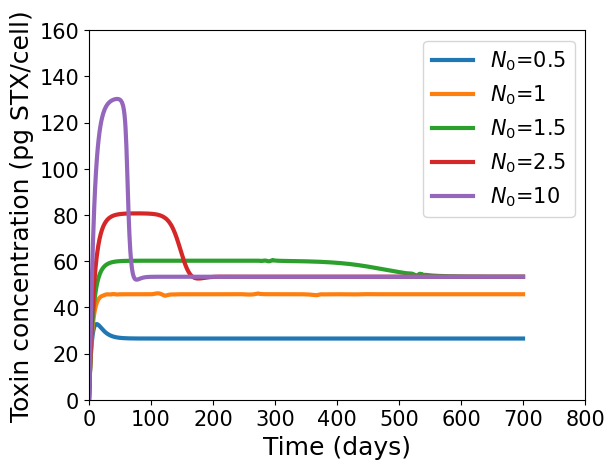

In [13]:
# Define the initial conditions
N_init = 1
P_init = 0.1
X_init = 0
y0 = [N_init, P_init, X_init]

# Define the time span
tspan = np.linspace(0, 700, 1000)

# Define the N0 values to loop through
N0_list = [ 0.5, 1, 1.5, 2.5, 10]

# Loop through the N0 values and plot the time series of X
for N0 in N0_list:
    # Solve the system of differential equations
    sol = odeint(system, y0, tspan, args=(N0, mu, k, m, D, delta, gamma, n_p))

    # Extract the time series of X in µmolN/cell
    X_umolN_cell = sol[:, 2]

    # Convert X from µmolN/cell to pg of Saxitoxin/cell
    X_pg_cell = (X_umolN_cell * 14.0067 * 299.29 / 98) * 10**6

    # Plot the time series of X for the current N0 value
    plt.plot(tspan, X_pg_cell, label=f'$N_0$={N0}',linewidth=3,)

# Add legend and axis labels
plt.legend  (fontsize=15)


plt.xlabel('Time (days)',fontsize=18)
plt.ylabel('Toxin concentration (pg STX/cell)',fontsize=18)
#increase the size of axis 
plt.xticks(fontsize=15)  # Augment the font size of x-axis tick labels
plt.yticks(fontsize=15)  # Augment the font size of y-axis tick labels


plt.xlim(left=0)
plt.xlim(right=800)
plt.ylim([0,160])
# Show the plot
plt.show()


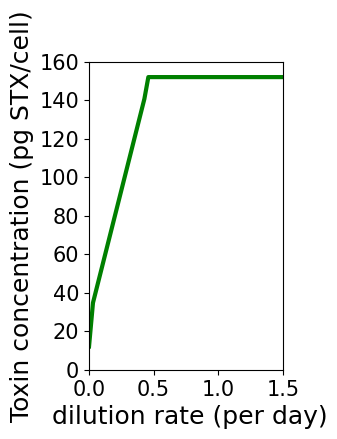

In [14]:
# Define the initial conditions
N_init = 1
P_init = 0.1
X_init = 0

y0 = [N_init, P_init, X_init]
N0=30
delta=0.1
# Define the different values of D to be plotted
D_values = np.linspace(0, 1.5, 50)
#D_values = np.linspace(0.01, 1.5, 50)

# Initialize an empty array to store the final values of X for each D value
X_final_values = []

# Solve the system of differential equations for each value of D and store the final value of X in X_final_values
for D in D_values:
    sol = odeint(system, y0, tspan, args=(N0, mu, k, m, D, delta, gamma, n_p))
    X_umolN_cell = sol[:, 2]
    
    X_pg_cell = (X_umolN_cell * 14.0067 * 299.29 / 98) * 10**6
    
    X_final_values.append(X_pg_cell[-1])

# Plot X as a function of D

plt.figure ("subplot example",figsize=(2.5,4))
plt.plot(D_values, X_final_values,color='green',linewidth=3)

plt.ylim([0, 160])
plt.xlim([0, 1.5]) 

plt.xticks(fontsize=15)  # Augment the font size of x-axis tick labels
plt.yticks(fontsize=15)  # Augment the font size of y-axis tick labels
plt.grid =('true')
plt.xlabel(' dilution rate (per day)',fontsize=18)
plt.ylabel('Toxin concentration (pg STX/cell)',fontsize=18)
plt.show()



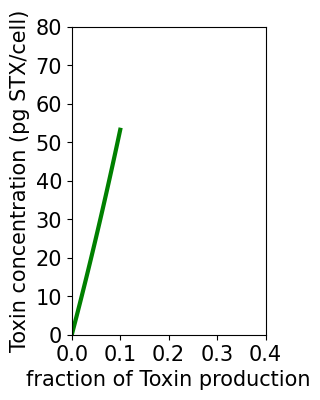

In [15]:
# Define the initial conditions
N_init = 1
P_init = 0.1
X_init = 0



# Define the different values of delta to be plotted

delta_values= np.linspace(0,0.1,50)

# Define the dilution rate
D=0.1
N0=30
# Define lists to store the values of X for each value of delta
X_values = []

# Solve the system of differential equations for each value of delta and store the values of X in X_values
for delta in delta_values:
    sol = odeint(system, y0, tspan, args=(N0, mu, k, m, D, delta, gamma, n_p))
    X_umolN_cell = sol[:, 2]
    X_pg_cell = (X_umolN_cell * 14.0067 * 299.29 / 98) * 10**6
    X_values.append(X_pg_cell[-1])

# Plot the values of X for each value of delta

plt.figure ("subplot example",figsize=(2.5,4))

plt.grid =('true')
plt.plot(delta_values, X_values,color='green',linewidth=3)

plt.ylim([0, 80])
plt.xlim([0, 0.4]) 
plt.xticks(fontsize=15)  # Augment the font size of x-axis tick labels
plt.yticks(fontsize=15)  # Augment the font size of y-axis tick labels

plt.xlabel('fraction of Toxin production', fontsize=15)
plt.ylabel('Toxin concentration (pg STX/cell)', fontsize=15)
plt.show()



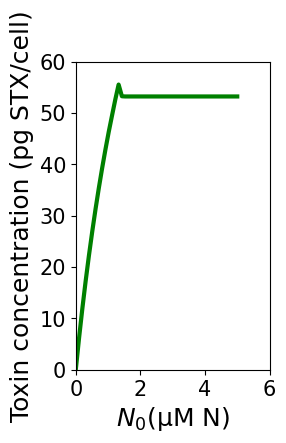

In [16]:
# Define the initial conditions
N_init = 1
P_init = 0.1
X_init = 0



# Define the different values of N0 to be plotted

N0_values= np.linspace(0,5,50)

#N0_values= np.linspace(0.001,45,50)

D=0.1
delta=0.1
# Initialize an empty array to store the final values of X for each N0 value
X_final_values = []

# Solve the system of differential equations for each value of N0 and store the final value of X in X_final_values
for N0 in N0_values:
    sol = odeint(system, [N_init, P_init, X_init], tspan, args=(N0, mu, k, m, D, delta, gamma, n_p))
    X_umolN_cell = sol[:, 2]
    X_pg_cell = (X_umolN_cell * 14.0067 * 299.29 / 98) * 10**6
    X_final_values.append(X_pg_cell[-1])

# Plot X as a function of N0

plt.figure ("subplot example",figsize=(2.5,4))

plt.grid =('true')
plt.plot(N0_values, X_final_values,color='green',linewidth=3)

plt.xlim ([0,6])
plt.ylim([0,60])
plt.xticks(fontsize=15)  # Augment the font size of x-axis tick labels
plt.yticks(fontsize=15)  # Augment the font size of y-axis tick labels

plt.xlabel('$N_0 $(µM N)', fontsize=18)
plt.ylabel('Toxin concentration (pg STX/cell)',fontsize=18)
plt.show()



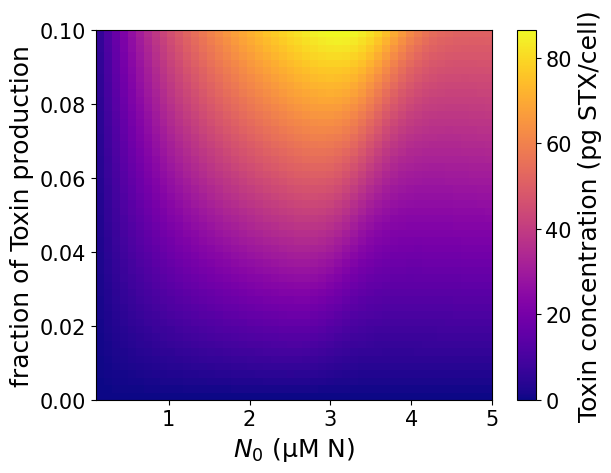

In [88]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Define the range of values for N0 and delta
N0_values = np.linspace(0.1, 5, 50)
delta_values = np.linspace(0, 0.1, 50)

# Define the dilution rate
D = 0.1

# Define an empty matrix to store the values of X for each combination of delta and N0
X_map = np.zeros((len(delta_values), len(N0_values)))

# Loop over each combination of delta and N0 and solve the system of differential equations
for i, delta in enumerate(delta_values):
    for j, N0 in enumerate(N0_values):
        y0 = [N_init, P_init, X_init]
        sol = odeint(system, y0, tspan, args=(N0, mu, k, m, D, delta, gamma, n_p))
        X_umolN_cell = sol[:, 2]
        X_pg_cell = (X_umolN_cell * 14.0067 * 299.29 / 98) * 10 ** 6
        X_map[i, j] = X_pg_cell[-1]

# Plot the 2D map
plt.imshow(X_map, extent=[N0_values.min(), N0_values.max(), delta_values.min(), delta_values.max()], origin='lower', aspect='auto', cmap='plasma')
cbar = plt.colorbar()
cbar.set_label('Toxin concentration (pg STX/cell)', fontsize=18)  # Set fontsize of the colorbar label
# Increase the size of tick labels on x and y axes
plt.tick_params(axis='both', which='major', labelsize=15)
cbar.ax.tick_params(labelsize=15)  # Set fontsize of the colorbar tick labels
plt.xlabel('$N_0$ (µM N)', fontsize=18)
plt.ylabel('fraction of Toxin production', fontsize=18)

plt.show()




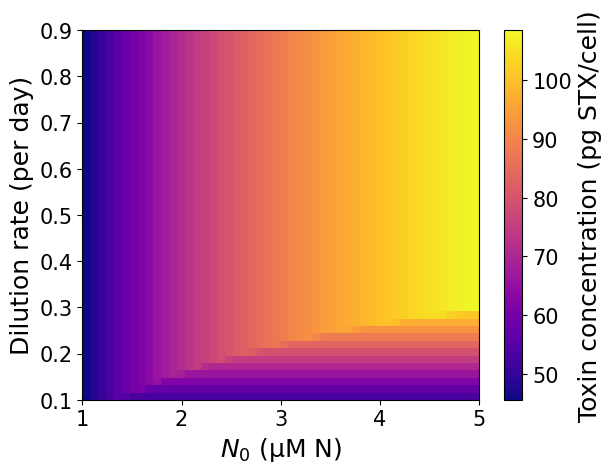

In [48]:
# Define the initial conditions
N_init = 1
P_init = 0.1
X_init = 0



# Define the range of values for N0 and dilution rate
N0_values = np.linspace(1, 5, 50)
D_values = np.linspace(0.1, 0.9, 50)

# Define the toxin production fraction delta
delta = 0.1

# Define an empty matrix to store the values of X for each combination of N0 and dilution rate
X_map = np.zeros((len(D_values), len(N0_values)))

# Loop over each combination of N0 and dilution rate and solve the system of differential equations
for i, D in enumerate(D_values):
    for j, N0 in enumerate(N0_values):
        y0 = [N_init, P_init, X_init]
        sol = odeint(system, y0, tspan, args=(N0, mu, k, m, D, delta, gamma, n_p))
        X_umolN_cell = sol[:, 2]
        X_pg_cell = (X_umolN_cell * 14.0067 * 299.29 / 98) * 10**6
        X_map[i, j] = X_pg_cell[-1]

# Plot the 2D map
plt.imshow(X_map, extent=[N0_values.min(), N0_values.max(), D_values.min(), D_values.max()], origin='lower', aspect='auto', cmap='plasma')
cbar= plt.colorbar()
cbar.set_label('Toxin concentration (pg STX/cell)',fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=15)
cbar.ax.tick_params(labelsize=15)  # Set fontsize of the colorbar tick labels
plt.xlabel('$N_0$ (µM N)',fontsize=18)
plt.ylabel('Dilution rate (per day)',fontsize=18)

plt.show()


In [23]:
def eqlm_analytic1(N0, mu, k, m, D, delta, gamma, n_p):
    return N0, 0,delta*mu*N0*n_p/(gamma*(N0+k))

def X_analytic1(N0, mu, k, m, D, delta, gamma, n_p):
    return delta*mu*N0*n_p/(gamma*(N0+k))

def X_analytic2(N0, mu, k, m, D, delta, gamma, n_p):
    return delta*(D+m)*n_p/(gamma*(1-delta))

print (X_analytic1(30,0.69,2.62,0.1,0.1,0.1,0.2,1.12*10**-5))

print (X_analytic2(30,0.69,2.62,0.1,0.1,0.1,0.2,1.12*10**-5))


3.553648068669528e-06
1.2444444444444447e-06
